# <font color='salmon'>IS Model: Correlation Between GDP and TAX in Germany 1991 - 2020

BM 2020A Short Semester Group 2

- Andrea Natania -- 23102010092
- Fiola Chrysantina -- 23102010067
- Nathania Gunawan -- 23102010070

## <font color='blue'>Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py
from linearmodels.iv import IV2SLS
from scipy import stats
from patsy import dmatrices

In [2]:
import statsmodels.api as sm
#from statsmodels.graphics.gofplots import Probplot
import statsmodels.graphics.tsaplots as sgt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings .filterwarnings("ignore")

## <font color='blue'>Overview Data

In [3]:
df = pd.read_csv('NEWEST GERMANY1.csv')
df

,YEAR,GDP,TAX,INV,GXP,CON
0,1990,1598.640,58.42,0.100,875.040216,998.270000
1,1991,1875.618,75.67,0.300,871.554000,1047.324691
2,1992,2136.312,83.04,0.100,1010.840000,1194.112711
3,1993,2072.457,79.35,0.023,999.541000,1173.602271
4,1994,2209.934,80.90,0.300,1066.887000,1239.074364
5,1995,2588.002,91.81,0.500,1426.430200,1443.964788
6,1996,2498.113,90.98,0.600,1234.544000,1406.216532
7,1997,2214.694,91.64,0.800,1075.640100,1242.955109
8,1998,2242.065,95.56,1.300,1079.448300,1246.055352
9,1999,2197.125,102.94,3.900,1059.279500,1233.498753


- GDP : Annual GDP (in Billion USD)
- TAX : Tax on Income, Profit, and Capital Gains (in Billion USD)
- INV : Foreign Direct Investment
- GXP : Goverment Expenditure (in Billion USD)
- CON : Consumer Spending (in Billion USD)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    31 non-null     int64  
 1   GDP     31 non-null     float64
 2   TAX     31 non-null     float64
 3   INV     31 non-null     float64
 4   GXP     31 non-null     float64
 5   CON     31 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.6 KB


In [5]:
df.isnull().sum()

YEAR    0
GDP     0
TAX     0
INV     0
GXP     0
CON     0
dtype: int64

## <font color='blue'>Checking Outliers

In [6]:
df.describe()

,YEAR,GDP,TAX,INV,GXP,CON
count,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000
mean,2005.000000,2899.109323,113.344839,2.068484,1354.25383,1586.744942
std,9.092121,759.265882,31.779756,2.297920,319.35271,373.680843
min,1990.000000,1598.640000,58.420000,0.023000,871.55400,998.270000
25%,1997.500000,2203.529500,92.420000,0.650000,1063.08325,1236.286558
50%,2005.000000,2848.438000,106.430000,1.800000,1354.73470,1609.575380
75%,2012.500000,3609.462000,130.175000,2.600000,1639.72790,1930.993839
max,2020.000000,3979.093000,182.000000,12.700000,1954.02400,2077.641048


In [7]:
df.agg(['skew'])

,YEAR,GDP,TAX,INV,GXP,CON
skew,0.0,-0.058668,0.746461,3.439041,-0.020628,-0.116334


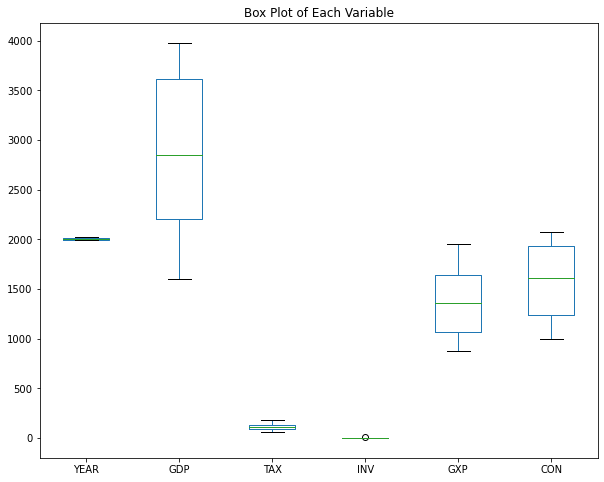

In [8]:
df.plot(figsize=(10,8), kind='box') #plot the box plot for each variable
plt.title("Box Plot of Each Variable")
plt.show()

## <font color='blue'>The Structural Model

<div style="text-align: center"> $CON_{t} = \beta_{0} + \beta_{1} Y_{dt}$ <br> </div>
<div style="text-align: center"> $TAX_{t} = \alpha_{0} + \alpha_{1} Y_{t}  + v_{t}$ <br> </div>
<div style="text-align: center"> $INV_{t} = \gamma_{0} + \gamma_{1} r_{t}$ <br> </div>
<div style="text-align: center"> $GDP_{t} = C_{t} + I_{t} + G_{t} + u_{t}$ <br> </div>
<div style="text-align: center"> $GXP_{t} = G$ <br> </div>

<div style="text-align: center"> $Y_{dt} = Y_{t} - T_{t}$ <br> </div>

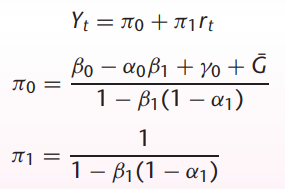


Source: <br>
- Gujarati, Damodar N., and Porter, Dawn C. (2009) *Basic Econometrics*. 5th edition. New York: McGraw-Hill. pp.677. <br>

Endogenous Variables => $GDP$, $TAX$ <br>
Exogenous Variables => $INV$, $GXP$, $CON$

## <font color='blue'>Reduced Form

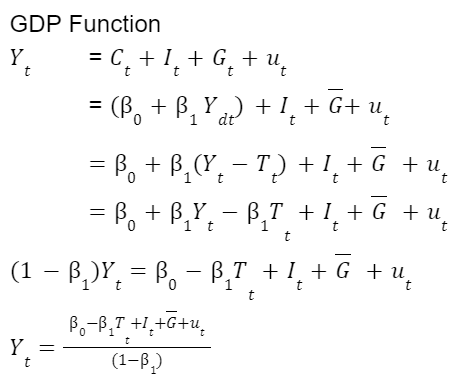

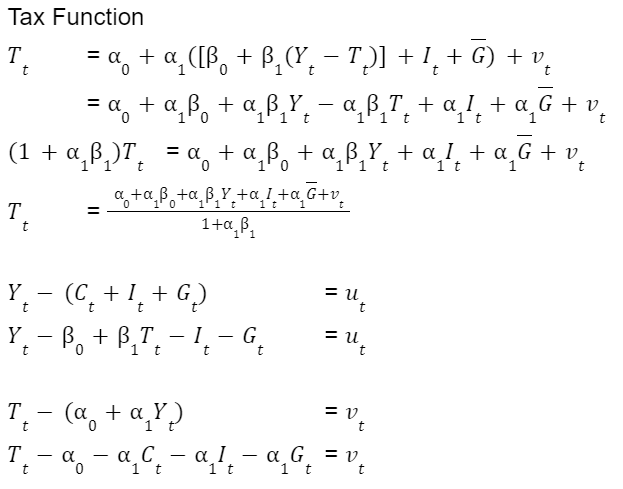

## <font color='blue'> Modelling

### <font color='orange'> Proportion Dataset for Training and Testing

In [9]:
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:] #train test splitting
print('Training Data:',len(df_train),'data')
print('Testing Data:', len(df_test), 'data')

Training Data: 24 data
Testing Data: 7 data


## <font color='blue'> Hausman Test

In [10]:
dfx = sm.tools.tools.add_constant(df_train)

### <font color='orange'> Check the Endogenous of GDP to TAX

#### First Stage Regression

In [11]:
reg_s1_GDP = sm.OLS(dfx['GDP'], dfx[['const','INV', 'GXP', 'CON']]).fit()
print(reg_s1_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1597.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           5.68e-24
Time:                        23:05:50   Log-Likelihood:                -124.35
No. Observations:                  24   AIC:                             256.7
Df Residuals:                      20   BIC:                             261.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -165.8582     47.183     -3.515      0.0

In [12]:
dfx['GDP_pred']= reg_s1_GDP.predict()
dfx['GDP_resid'] = reg_s1_GDP.resid
dfx.head()

,const,YEAR,GDP,TAX,INV,GXP,CON,GDP_pred,GDP_resid
0,1.0,1990,1598.640,58.42,0.100,875.040216,998.270000,1729.539408,-130.899408
1,1.0,1991,1875.618,75.67,0.300,871.554000,1047.324691,1830.445777,45.172223
2,1.0,1992,2136.312,83.04,0.100,1010.840000,1194.112711,2107.007125,29.304875
3,1.0,1993,2072.457,79.35,0.023,999.541000,1173.602271,2066.846688,5.610312
4,1.0,1994,2209.934,80.90,0.300,1066.887000,1239.074364,2190.169808,19.764192


#### Second Stage Regression

In [13]:
reg_s2_GDP = sm.OLS(dfx['TAX'], dfx[['const','GDP_pred','GDP_resid']]).fit()
print(reg_s2_GDP.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     29.63
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           7.70e-07
Time:                        23:05:50   Log-Likelihood:                -85.989
No. Observations:                  24   AIC:                             178.0
Df Residuals:                      21   BIC:                             181.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4272      7.807      5.562      0.0

==================================================================================== <br>
$H_{0}$ : There is no endogeneity <br>
$H_{1}$ : There is endogeneity <br>

P-Value of Residual < 0.05, reject null hypothesis. Thus, GDP is endogenenous to TAX.<br>
==================================================================================== <br>

### <font color='orange'> Checking the Endogenous of TAX to GDP

#### First Stage Regression

In [14]:
reg_s1_TAX = sm.OLS(dfx['TAX'], dfx[['const','GDP']]).fit()
print(reg_s1_TAX.summary())

                            OLS Regression Results                            
Dep. Variable:                    TAX   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     50.46
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.00e-07
Time:                        23:05:50   Log-Likelihood:                -87.773
No. Observations:                  24   AIC:                             179.5
Df Residuals:                      22   BIC:                             181.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5316      8.200      5.187      0.0

In [15]:
dfx['TAX_pred']= reg_s1_TAX.predict()
dfx['TAX_resid'] = reg_s1_TAX.resid
dfx.head()

,const,YEAR,GDP,TAX,INV,GXP,CON,GDP_pred,GDP_resid,TAX_pred,TAX_resid
0,1.0,1990,1598.640,58.42,0.100,875.040216,998.270000,1729.539408,-130.899408,76.531110,-18.111110
1,1.0,1991,1875.618,75.67,0.300,871.554000,1047.324691,1830.445777,45.172223,82.421819,-6.751819
2,1.0,1992,2136.312,83.04,0.100,1010.840000,1194.112711,2107.007125,29.304875,87.966203,-4.926203
3,1.0,1993,2072.457,79.35,0.023,999.541000,1173.602271,2066.846688,5.610312,86.608148,-7.258148
4,1.0,1994,2209.934,80.90,0.300,1066.887000,1239.074364,2190.169808,19.764192,89.531979,-8.631979


#### Second Stage Regression

In [16]:
reg_s2_TAX = sm.OLS(dfx['GDP'], dfx[['const','TAX_pred','TAX_resid']]).fit()
print(reg_s2_TAX.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.156e+31
Date:                Fri, 02 Sep 2022   Prob (F-statistic):          3.64e-316
Time:                        23:05:50   Log-Likelihood:                 639.94
No. Observations:                  24   AIC:                            -1274.
Df Residuals:                      21   BIC:                            -1270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1999.8124   9.78e-13  -2.04e+15      0.0

==================================================================================== <br>
$H_{0}$ : There is no endogeneity <br>
$H_{1}$ : There is endogeneity <br>

P-Value of Residual < 0.05, reject null hypothesis. Thus, TAX is endogenenous to GDP.<br>
==================================================================================== <br>

## <font color='blue'> Model Identification by Order and Rank

M = Number of Endogenous Variables in the Model <br>
m = Number of Endogenous Variables in a Given Equation <br>
K = Number of Predetermined or Exogenous Variables in the Model <br>
k = Number of Predetermined or Exogenous in a Given Equation <br>

If K-k >= m-1, then the given equation is exactly identified. <br>
If K-k < m-1, then the given equation is exactly unidentified.<br>

Note: K include the intercept, so the total of exogeneous variable in the model added by intercept (in this case = 1)

### <font color='orange'> Order by Condition

We want that K−k >= m−1 <br>
Endogenous Variables => $GDP$, $TAX$ <br>
Exogenous Variables => $INV$, $GXP$, $CON$ <br>

Identification of the GDP equation: <br>
from the our equations, we get M=2,m=2,K=4,k=3 <br> 

K-k >= m-1 <br> 
4-3 >= 2-1 <br> 
1   >= 1  --> Identified <br>

Identification of the TAX equation: <br>
from the our equations, we get M=2,m=2,K=3,k=0 <br>
K-k >= m-1 <br> 
3-0 >= 2-1 <br> 
3   >= 1  --> Identified <br>

In [17]:
eq = ['GDP','TAX']
K = ['4','3'] # 4 variabel eksogen ditambah 2 intercept karena berdasarkan buku K adlh jumlah variabel eksogen include dengan intercept
k = ['3','0']
Kk = ['1','3']

m = ['2','2']
m1 = ['1','1']

i = ['Exactly Identified', 'Over Identified']

col = {'Equation': eq, 
           'K': K, 
           'k': k,
           'K-k':Kk, 
           'm': m, 
           'm-1': m1, 
           'Identification': i}
oc = pd.DataFrame(col).set_index('Equation')
oc

,K,k,K-k,m,m-1,Identification
Equation,,,,,,
GDP,4,3,1,2,1,Exactly Identified
TAX,3,0,3,2,1,Over Identified


### <font color='orange'> Rank Condition

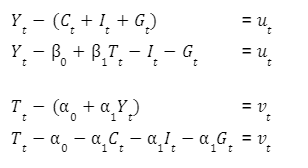

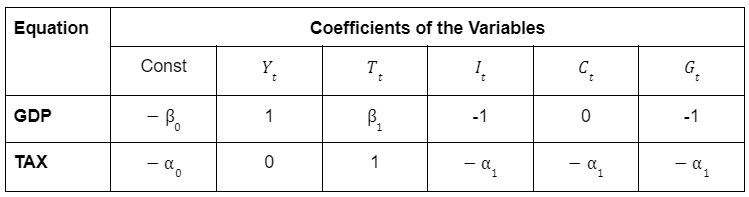

**Identification of the GDP equation**
1. From the table above, cross out all the coefficients in the first row and the columns with non-zero coefficients in the first row.
2. Suppose A is a matrix containing the Life Expectancy coefficient after the deletion process. Therefore, the value of A is obtained as follows.


\begin{bmatrix} 
-\alpha_{1} \\
\end{bmatrix}   
and $det|A| = -\alpha_{1} \neq 0$. <br>
    Since the determinant value of A≠0, this equation is identified with rank =1  

**Identification of the TAX equation**
1. From the table above, cross out all the coefficients in the second row and the columns with non-zero coefficients in the second row.
2. Suppose Z is a matrix containing the Life Expectancy coefficient after the deletion process. Therefore, the value of Z is obtained as follows.

\begin{bmatrix} 
1 \\
\end{bmatrix}   
and $det|Z| = 1 \neq 0$. <br>
    Since the determinant value of Z≠0, this equation is identified with rank =1
   

## <font color='blue'> Two-Stage Least Squares Method

### <font color='orange'> GDP Model

In [18]:
formula1 = "GDP ~ 1 + [CON ~ TAX] + INV + GXP"
mod1 = IV2SLS.from_formula(formula1, df_train).fit()
print(mod1.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    GDP   R-squared:                      0.9908
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9895
No. Observations:                  24   F-statistic:                    4295.7
Date:                Fri, Sep 02 2022   P-value (F-stat)                0.0000
Time:                        23:05:50   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -114.27     58.308    -1.9597     0.0500     -228.55      0.0145
GXP           -1.0905     0.7226    -1.5093     0.13

In [19]:
print(mod1.first_stage)

    First Stage Estimation Results    
                                   CON
--------------------------------------
R-squared                       0.9763
Partial R-squared               0.2565
Shea's R-squared                0.2565
Partial F-statistic             5.1500
P-value (Partial F-stat)        0.0232
Partial F-stat Distn           chi2(1)
========================== ===========
Intercept                      -188.91
                             (-3.1560)
GXP                             1.0282
                              (9.9425)
INV                            -8.6584
                             (-2.3073)
TAX                             3.9939
                              (2.2694)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


### <font color='orange'> TAX Model


In [20]:
formula2 = "TAX ~ 1 + [GDP ~ INV + GXP + CON]"
mod2 = IV2SLS.from_formula(formula2, df_train).fit()
print(mod2.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                    TAX   R-squared:                      0.6962
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6824
No. Observations:                  24   F-statistic:                    44.228
Date:                Fri, Sep 02 2022   P-value (F-stat)                0.0000
Time:                        23:05:50   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      43.427     9.5157     4.5637     0.0000      24.777      62.078
GDP            0.0209     0.0031     6.6504     0.00

In [21]:
print(mod2.first_stage)

    First Stage Estimation Results    
                                   GDP
--------------------------------------
R-squared                       0.9958
Partial R-squared               0.9958
Shea's R-squared                0.9958
Partial F-statistic             8953.2
P-value (Partial F-stat)        0.0000
Partial F-stat Distn           chi2(3)
========================== ===========
Intercept                      -165.86
                             (-2.9781)
CON                             2.0370
                              (16.669)
GXP                            -0.1580
                             (-1.0159)
INV                             2.1649
                              (0.9617)
--------------------------------------

T-stats reported in parentheses
T-stats use same covariance type as original model


=======================================================================================<br>
The first stage summary shows the parameter estimation for the reduced form of $GDP$. <br>
The second stage summary shows the parameter estimation for the $TAX$ Model.

$\hat{GDP} = -1264.7 + 0.7545 GXP -85.089 INV  +31.715 \hat{TAX}$ <br>

with <br>
$\hat{TAX} = 43.427 + 0.0209 \hat{GDP} $ <br>

From the coefficients, we can see that $TAX$ and $GXP$ variables have positive correlation and $INV$ has negative correlation with $GDP$ variable <br>
<br>

=======================================================================================<br>


## <font color='blue'>Diagnostic Testing</font>

In [22]:
df_train["GDP_pred"] = mod1.fitted_values 
df_train["GDP_resid"] = mod1.resids
df_train["TAX_pred"] = mod2.fitted_values
df_train["TAX_resid"] = mod2.resids
df_train.head()

,YEAR,GDP,TAX,INV,GXP,CON,GDP_pred,GDP_resid,TAX_pred,TAX_resid
0,1990,1598.640,58.42,0.100,875.040216,998.270000,1722.723338,-124.083338,76.887742,-18.467742
1,1991,1875.618,75.67,0.300,871.554000,1047.324691,1863.644367,11.973633,82.685070,-7.015070
2,1992,2136.312,83.04,0.100,1010.840000,1194.112711,2122.226548,14.085452,88.141562,-5.101562
3,1993,2072.457,79.35,0.023,999.541000,1173.602271,2077.215543,-4.758543,86.805036,-7.455036
4,1994,2209.934,80.90,0.300,1066.887000,1239.074364,2186.780574,23.153426,89.682518,-8.782518


In [23]:
print("GDP Model :  \t Sum of Residuals = ", df_train["GDP_resid"].sum())
print("TAX Model :  \t Sum of Residuals = ", df_train["TAX_resid"].sum())

GDP Model :  	 Sum of Residuals =  5.895799404243007e-10
TAX Model :  	 Sum of Residuals =  9.521272659185342e-13


### <font color='orange'> Normality Test

#### <font color='purple'>GDP MODEL

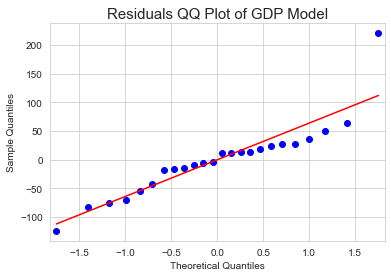

In [24]:
sns.set_style('whitegrid')
sm.qqplot(df_train["GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [25]:
jb_GDP = stats.jarque_bera(df_train["GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  20.730188131599522
Jarque-Bera P-Value:  3.151351470787045e-05


After conducting statistic test to check the normality of the residuals for the $GDP$ model, we get the *P-value* equals to 0.5518377656687989. <br>
This value is bigger than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data distribution is normal , <br>
|| $h_{1}:$ data distribution is not normal ,<br>
then we do not reject $h_{0}$, i.e. the residuals of the $GDP$ model are __normal__.

#### <font color='purple'>TAX MODEL

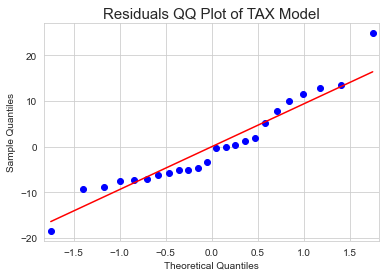

In [26]:
sns.set_style('whitegrid')
sm.qqplot(df_train["TAX_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of TAX Model', size=15)
py.show()

In [27]:
jb_TAX = stats.jarque_bera(df_train["TAX_resid"])
print("Jarque-Bera Statistics: ", jb_TAX[0])
print("Jarque-Bera P-Value: ", jb_TAX[1])

Jarque-Bera Statistics:  1.920512601694465
Jarque-Bera P-Value:  0.38279476277910374


After conducting statistic test to check the normality of the residuals for the $TAX$ model, we get the *P-value* equals to 0.38279476277905244. <br>
This value is greater than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data distribution is normal , <br>
|| $h_{1}:$ data distribution is not normal ,<br>
then we do not reject $h_{0}$, i.e. the residuals of the $TAX$ model are __normal__.

### <font color='orange'> Heteroskedasticity Test

#### <font color='purple'>GDP MODEL

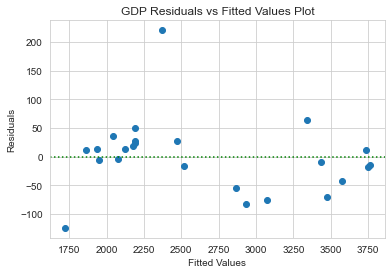

In [28]:
plt.scatter(df_train['GDP_pred'], df_train['GDP_resid']) #resid vs fitted plot
plt.axhline(y = df_train['GDP_resid'].mean(), color ='green', linestyle =':')
plt.title('GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [29]:
m1 = "GDP ~ 1 + TAX + INV + GXP"
y, X = dmatrices(m1, df_train, return_type='dataframe')

bp_GDP = het_breuschpagan(df_train["GDP_resid"], X)
bp_GDP

print("Breusch-Pagan Statistics: ", bp_GDP[0])
print("Breusch-Pagan P-Value: ", bp_GDP[1])

Breusch-Pagan Statistics:  6.418123356786899
Breusch-Pagan P-Value:  0.09294805033265628


After conducting statistic test to check the hetrokedasticity of the residuals for the $GDP$ model, we get the *P-value* equals to 0.8283845874197588. <br>
This value is greater than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data variance is constant  , <br>
|| $h_{1}:$ data variance is not constant ,<br>
then we do not reject $h_{0}$, i.e. the residuals' variance of the transformed $GDP$ model is __constant, i.e. homokedasticity__.

#### <font color='purple'>TAX MODEL

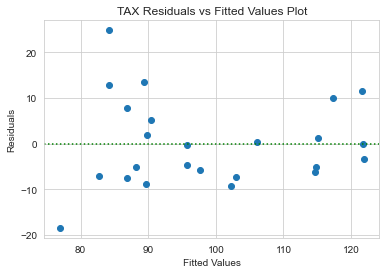

In [30]:
plt.scatter(df_train['TAX_pred'], df_train['TAX_resid']) #resid vs fitted plot
plt.axhline(y = df_train['TAX_resid'].mean(), color ='green', linestyle =':')
plt.title('TAX Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [31]:
m2 = "TAX ~ 1 + INV + GXP + CON"
y, X = dmatrices(m2, df_train, return_type='dataframe')

bp_TAX = het_breuschpagan(df_train["TAX_resid"], X)
bp_TAX

print("Breusch-Pagan Statistics: ", bp_TAX[0])
print("Breusch-Pagan P-Value: ", bp_TAX[1])

Breusch-Pagan Statistics:  15.942045374889549
Breusch-Pagan P-Value:  0.0011654338263701104


After conducting statistic test to check the hetrokedasticity of the residuals for the $TAX$ model, we get the *P-value* equals to  0.0011654338263699443. <br>
This value is less than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data variance is constant  , <br>
|| $h_{1}:$ data variance is not constant ,<br>
then we reject $h_{0}$, i.e. the residuals' variance of the $TAX$ model is __not constant, i.e. heteroskedasticity__.

### <font color='orange'> Multicollinearity Test

In [32]:
def calc_vif(x): #vif function
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

#### <font color='purple'>GDP MODEL

In [33]:
vif_GDP = df_train[['TAX','INV','GXP']]
calc_vif(vif_GDP)

,Variables,VIF
0,TAX,98.461963
1,INV,2.828877
2,GXP,85.410509


Based on the table above, it is found that the VIF values of TAX, INV, and GXP are greater than 5. Therefore, there is multicollinearity between these variables.

#### <font color='purple'>TAX MODEL

In [34]:
vif_TAX = df_train[['INV', 'CON', 'GXP']]
calc_vif(vif_TAX)

,Variables,VIF
0,INV,1.530888
1,CON,567.127648
2,GXP,565.504310


Based on the table above, it is found that the VIF values of CON, INV, and GXP are greater than 5. Therefore, there is multicollinearity between these variables.

### <font color='orange'> Autocorrelation Test

#### <font color='purple'>GDP MODEL

In [35]:
durbin_watson(df_train['GDP_resid'])

1.391575921229655

Based on Durbin Watson's rule of thumb, the results of the DW Test Statistics show that there is an autocorrelation in the GDP model because the results are not between 1.5 - 2.5

#### <font color='purple'>TAX MODEL

In [36]:
durbin_watson(df_train['TAX_resid'])

0.47415366109453244

Based on Durbin Watson's rule of thumb, the results of the DW Test Statistics show that there is an autocorrelation in the TAX model because the results are not between 1.5 - 2.5

## <font color='blue'> First Transformation Data

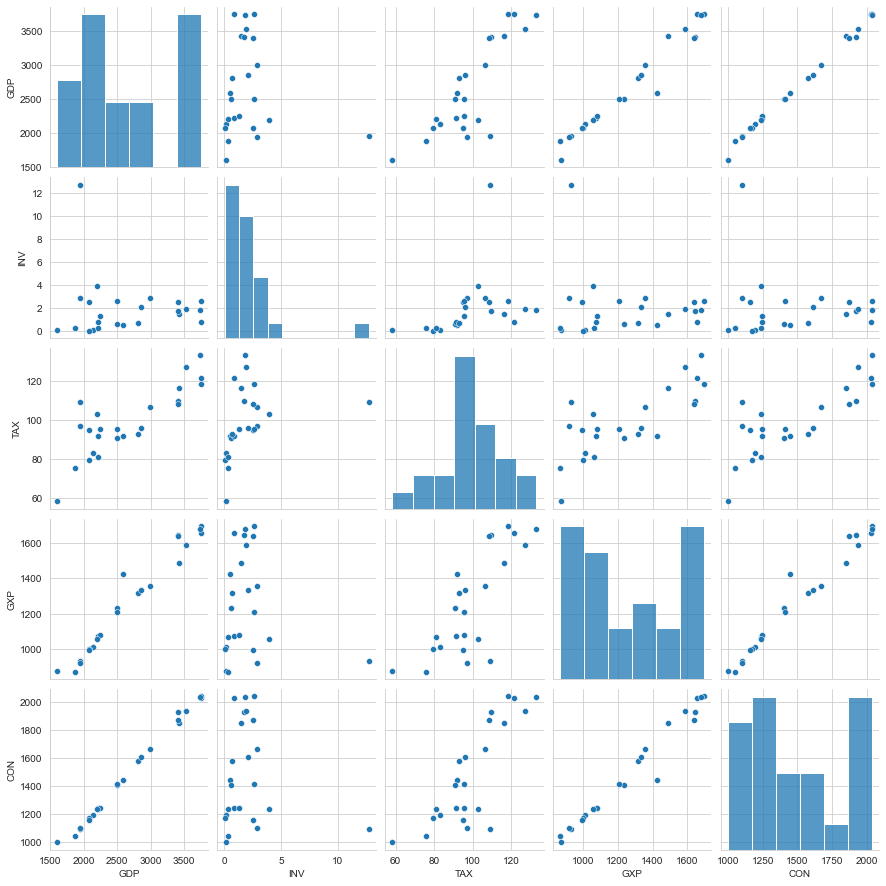

In [37]:
sns.pairplot(data=df_train[["GDP","INV","TAX","GXP","CON"]])
plt.show()

In [38]:
print('GDP Skewness:',df_train['GDP'].skew())
print('TAX Skewness:',df_train['TAX'].skew())
print('INV Skewness:',df_train['INV'].skew())
print('GXP Skewness:',df_train['GXP'].skew())
print('CON Skewness:',df_train['CON'].skew())

GDP Skewness: 0.38760215661499464
TAX Skewness: -0.08442826902887984
INV Skewness: 3.5246090141625332
GXP Skewness: 0.2706750821294627
CON Skewness: 0.3843110364060779


Left skewed: TAX <BR>
Right Skewed : INV, GDP, GXP, CON

## <font color='blue'> Transformation Data

In [39]:
df_trainGDP1 = df_train.copy()
df_trainTAX1 = df_train.copy()

df_trainGDP1['sqrt_GDP'] = df_train['GDP']**(1/2)
df_trainGDP1['sq_GXP'] = df_train['GXP']**(2)
df_trainGDP1['exp_TAX'] = np.exp(df_train['TAX'])
df_trainGDP1['ln_INV'] = np.log(df_train['INV'])
df_trainGDP1['reci_CON'] = df_train['CON']**(-1)

df_trainTAX1['sq_GDP'] = df_train['GDP']**(2)
df_trainTAX1['sq_GXP'] = df_train['GXP']**(2)
df_trainTAX1['ln_TAX'] = np.log(df_train['TAX'])
df_trainTAX1['ln_INV'] = np.log(df_train['INV'])
df_trainTAX1['reci_CON'] = df_train['CON']**(-1)

### <font color='orange'> The Transformed GDP Model

In [40]:
trans_formula11 = "sqrt_GDP ~ 1 + reci_CON + sq_GXP + ln_INV"
trans_mod11 = IV2SLS.from_formula(trans_formula11, df_trainGDP1).fit()
print(trans_mod11.summary)

                            OLS Estimation Summary                            
Dep. Variable:               sqrt_GDP   R-squared:                      0.9869
Estimator:                        OLS   Adj. R-squared:                 0.9849
No. Observations:                  24   F-statistic:                    1728.1
Date:                Fri, Sep 02 2022   P-value (F-stat)                0.0000
Time:                        23:06:04   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      66.061     4.2210     15.651     0.0000      57.788      74.334
ln_INV         0.0909     0.0721     1.2611     0.20

**SECOND STAGE** GDP Model:

$\hat{\ln{GDP}} = -5.1893 + 2.091e+60{CON}^{-1} + 2.018e+55 \ln{INV} + 1.741e+51{GXP}^{2}$ <br>

From the coefficients, we can see that $\ln{INV}$, and $\ln{GXP}$ variables have positive correlation with $\ln{GDP}$ variable, while $TAX$ variable has negative correlation with $\ln{GDP}$ variable. <br>
=======================================================================================<br>

### <font color='orange'> The Transformed TAX Model

In [41]:
trans_formula22 = "ln_TAX ~ 1 + [sq_GDP ~ ln_INV + sq_GXP + reci_CON]"
trans_mod22 = IV2SLS.from_formula(trans_formula22, df_trainTAX1).fit()
print(trans_mod22.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                 ln_TAX   R-squared:                      0.6392
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6228
No. Observations:                  24   F-statistic:                    27.974
Date:                Fri, Sep 02 2022   P-value (F-stat)                0.0000
Time:                        23:06:04   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.2929     0.0732     58.653     0.0000      4.1494      4.4363
sq_GDP      3.824e-08   7.23e-09     5.2890     0.00

**SECOND STAGE** Tax Model

$\hat{{TAX}^{1/2}} = -18.068 + 3.6280 \ln{GDP} $ <br>

The R-squared and Adjusted R-squared show that about 52% of the dependent variable can be estimated from the independent variables. <br>
=======================================================================================<br>

## <font color='blue'>Diagnostic Testing for Transformed Model</font>

In [42]:
df_trainGDP1["trans_GDP_pred"] = trans_mod11.fitted_values 
df_trainGDP1["trans_GDP_resid"] = trans_mod11.resids
df_trainTAX1["trans_TAX_pred"] = trans_mod22.fitted_values
df_trainTAX1["trans_TAX_resid"] = trans_mod22.resids

In [43]:
print("GDP Model :  \t Sum of Residuals = ", df_trainGDP1["trans_GDP_resid"].sum())
print("TAX Model :  \t Sum of Residuals = ", df_trainTAX1["trans_TAX_resid"].sum())

GDP Model :  	 Sum of Residuals =  -1.0516032489249483e-11
TAX Model :  	 Sum of Residuals =  -7.035261262444692e-12


### <font color='orange'> Normality Test

#### <font color='purple'>GDP MODEL

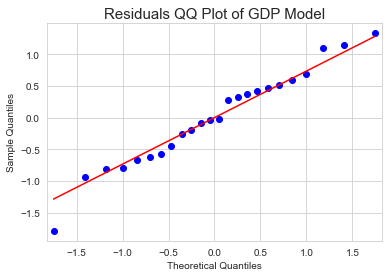

In [44]:
sns.set_style('whitegrid')
sm.qqplot(df_trainGDP1["trans_GDP_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of GDP Model', size=15)
py.show()

In [45]:
jb_GDP = stats.jarque_bera(df_trainGDP1["trans_GDP_resid"])
print("Jarque-Bera Statistics: ", jb_GDP[0])
print("Jarque-Bera P-Value: ", jb_GDP[1])

Jarque-Bera Statistics:  0.28699619529294307
Jarque-Bera P-Value:  0.8663224482372434


#### <font color='purple'>TAX MODEL

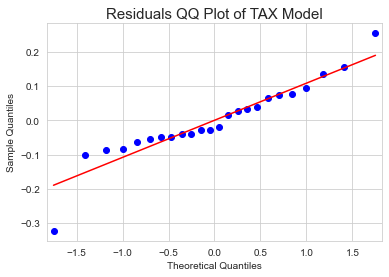

In [46]:
sns.set_style('whitegrid')
sm.qqplot(df_trainTAX1["trans_TAX_resid"], line='s') #qqplot
plt.title('Residuals QQ Plot of TAX Model', size=15)
py.show()

In [47]:
jb_TAX = stats.jarque_bera(df_trainTAX1["trans_TAX_resid"])
print("Jarque-Bera Statistics: ", jb_TAX[0])
print("Jarque-Bera P-Value: ", jb_TAX[1])

Jarque-Bera Statistics:  4.485258502165539
Jarque-Bera P-Value:  0.10617896589081688


### <font color='orange'> Heteroskedasticity Test


#### <font color='purple'>GDP MODEL

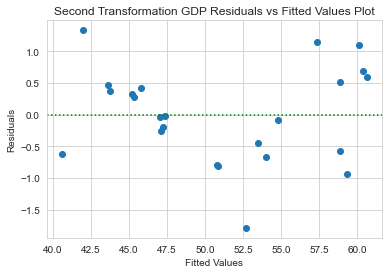

In [48]:
plt.scatter(df_trainGDP1['trans_GDP_pred'], df_trainGDP1['trans_GDP_resid']) #resid vs fitted plot
plt.axhline(y = df_trainGDP1['trans_GDP_resid'].mean(), color ='green', linestyle =':')
plt.title('Second Transformation GDP Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [49]:
m111 = 'sqrt_GDP ~ 1 + exp_TAX + ln_INV + sq_GXP'
y, X = dmatrices(m111, df_trainGDP1, return_type='dataframe')

bp_GDP11 = het_breuschpagan(df_trainGDP1["GDP_resid"], X)
bp_GDP11

print("Breusch-Pagan Statistics: ", bp_GDP11[0])
print("Breusch-Pagan P-Value: ", bp_GDP11[1])

Breusch-Pagan Statistics:  -4.11188224711209
Breusch-Pagan P-Value:  1.0


After conducting statistic test to check the hetrokedasticity of the residuals for the transformed $GDP$ model, we get the *P-value* equals to  0.14244817065972087. <br>
This value is greater than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data variance is constant  , <br>
|| $h_{1}:$ data variance is not constant ,<br>
then we do not reject $h_{0}$, i.e. the residuals' variance of the transformed $GDP$ model is __constant, i.e. homokedasticity__.

#### <font color='purple'>TAX MODEL

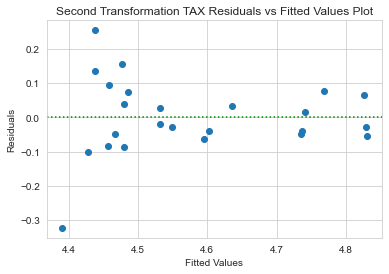

In [50]:
plt.scatter(df_trainTAX1['trans_TAX_pred'], df_trainTAX1['trans_TAX_resid']) #resid vs fitted plot
plt.axhline(y = df_trainTAX1['trans_TAX_resid'].mean(), color ='green', linestyle =':')
plt.title('Second Transformation TAX Residuals vs Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
py.show()

In [51]:
m122 = "ln_TAX ~ 1 + sq_GDP"
y, X = dmatrices(m122, df_trainTAX1, return_type='dataframe')

bp_TAX11 = het_breuschpagan(df_trainTAX1["TAX_resid"], X)
bp_TAX11

print("Breusch-Pagan Statistics: ", bp_TAX11[0])
print("Breusch-Pagan P-Value: ", bp_TAX11[1])  

Breusch-Pagan Statistics:  3.071668084269745
Breusch-Pagan P-Value:  0.07966768618130689


After conducting statistic test to check the hetrokedasticity of the residuals for the $TAX$ model, we get the *P-value* equals to  0.00811118400904641. <br>
This value is less than 0.05 (assume we choose 0.05 as our significance level/alpha). <br>
Thus, if we do a hypothesis test with <br>
|| $h_{0}:$ data variance is constant  , <br>
|| $h_{1}:$ data variance is not constant ,<br>
then we reject $h_{0}$, i.e. the residuals' variance of the $TAX$ model is __not constant, i.e. heteroskedasticity__.

### <font color='orange'> Multicollinearity Test

#### <font color='purple'>GDP MODEL

In [52]:
vif_GDP = df_trainGDP1[['exp_TAX','ln_INV','sq_GXP']]
calc_vif(vif_GDP)

,Variables,VIF
0,exp_TAX,1.116045
1,ln_INV,1.007829
2,sq_GXP,0.179259


#### <font color='purple'>TAX MODEL

In [53]:
vif_TAX = df_trainTAX1[['reci_CON','ln_INV','sq_GXP']]
calc_vif(vif_TAX)

,Variables,VIF
0,reci_CON,3.151912
1,ln_INV,1.113224
2,sq_GXP,3.187012


### <font color='orange'> Autocorrelation Test

#### <font color='purple'>GDP MODEL

In [54]:
durbin_watson(df_trainGDP1['trans_GDP_resid']) 

1.440477610551956

#### <font color='purple'>TAX MODEL

In [55]:
durbin_watson(df_trainTAX1['trans_TAX_resid'])

0.4667805295105414

**Conclusion of The Second Transformation in Classic Assumption Test**
1. In the transformed model, heteroscedasticity is still present
2. Since the VIF value is greater than 5. Therefore, there is multicollinearity between the variables.
3. There is an autocorrelation in the GDP and TAX model because the results are not between 1.5 - 2.5.
4. The data is normal

## <font color='blue'> Conclusion

- From the analysis above, we can conclude that GDP and TAX in Germany are endogenous to each other.
- The original model equations with thei estimated parameters:<BR>
$\hat{GDP} = 4.1979 + 0.1190 GXP + 308.64 INV  -0.0355 \hat{TAX}$ <br>
$\hat{TAX} = 31.233 + 0.0294 \hat{GDP} $ <br>
- Since the original  GDP  model generates residuals that are homoskedasticity, and the orignial  TAX  model generates residuals that are heteroskedasticity, then model transformation is needed.
- The transformed model equations with their estimated parameter: <BR>
$\hat{\ln{GDP}} = -1.1749 - 1.9574\ln{TAX} + 0.1953 \ln{INV} + 2.6664\ln{GXP}$ <br>
$\hat{\ln{TAX}} = -0.4485 + 0.6530 \ln{GDP} $ <br>

Source:
- GDP : https://countryeconomy.com/gdp/germany
- TAX : https://data.worldbank.org/indicator/GC.TAX.YPKG.CN?end=2020&locations=DE&start=1990
- INV : https://data.worldbank.org/indicator/BX.KLT.DINV.WD.GD.ZS?end=2020&locations=DE&start=1991&view=chart
- GXP : https://countryeconomy.com/government/expenditure/germany
- CON : https://www.macrotrends.net/countries/DEU/germany/consumer-spending